# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [3]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())
EPL18

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


## Step 2

In [6]:
# EPL18 win, draw, and loss value for Home and Away teams. Also initializing a counter variable
EPL18['homewinvalue'] = np.where(EPL18['FTR'] == 'H', 1, np.where(EPL18['FTR'] == 'D', 0.5, 0))
EPL18['awaywinvalue'] = np.where(EPL18['FTR'] == 'A', 1, np.where(EPL18['FTR'] == 'D', 0.5, 0))
EPL18['count'] = 1

## Step 3

In [48]:
games_played_2017 = EPL18[EPL18['Date'] < 20180000].reset_index(drop=True)
games_played_2018 = EPL18[EPL18['Date'] > 20180000].reset_index(drop=True)
gp2017_home = games_played_2017.groupby(['HomeTeam'])['count','homewinvalue', 'FTHG','FTAG'].sum().reset_index()
gp2017_away = games_played_2017.groupby(['AwayTeam'])['count','awaywinvalue', 'FTHG','FTAG'].sum().reset_index()
gp2017_home = gp2017_home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
gp2017_away = gp2017_away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
gp2017_away

,team,Pa,awaywinvalue,FTHGa,FTAGa
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 4 (home team)

In [19]:
gp2017 = pd.merge(gp2017_home, gp2017_away, on = ['team'])
gp2017

,team,Ph,homewinvalue,FTHGh,FTAGh,Pa,awaywinvalue,FTHGa,FTAGa
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


## Step 5 (home team)

In [20]:
gp2017['W'] = gp2017['homewinvalue'] + gp2017['awaywinvalue']
gp2017['G'] = gp2017['Ph'] + gp2017['Pa']
gp2017['GF'] = gp2017['FTHGh'] + gp2017['FTAGa']
gp2017['GA'] = gp2017['FTAGh'] + gp2017['FTHGa']
gp2017

,team,Ph,homewinvalue,FTHGh,FTAGh,Pa,awaywinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24


## Step 6 (home team)

In [21]:
#pythagorean expectation

gp2017['wpc17'] = gp2017['W']/gp2017['G']
gp2017['pyth17'] = gp2017['GF']**2/(gp2017['GF']**2 + gp2017['GA']**2)
gp2017

,team,Ph,homewinvalue,FTHGh,FTAGh,Pa,awaywinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc17,pyth17
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


In [64]:
wpc_difference = gp2017[['team', 'wpc17', 'pyth17']]
wpc_difference['diff'] = abs(wpc_difference['pyth17'] - wpc_difference['wpc17'])
print(wpc_difference[wpc_difference['diff'] == wpc_difference['diff'].min()])
print(min([0.157143, 0.007941, 0.140056, 0.076244]))
wpc_difference

        team    wpc17    pyth17      diff
8  Leicester  0.47619  0.484131  0.007941
0.007941


,team,wpc17,pyth17,diff
0,Arsenal,0.642857,0.681132,0.038275
1,Bournemouth,0.357143,0.280899,0.076244
2,Brighton,0.404762,0.264706,0.140056
3,Burnley,0.595238,0.528548,0.066690
4,Chelsea,0.738095,0.885847,0.147752
5,Crystal Palace,0.357143,0.240356,0.116787
6,Everton,0.476190,0.379018,0.097173
7,Huddersfield,0.428571,0.240356,0.188215
8,Leicester,0.476190,0.484131,0.007941
9,Liverpool,0.714286,0.800000,0.085714


## Optional steps, not required for Assessment 
### (Uncomment to run)

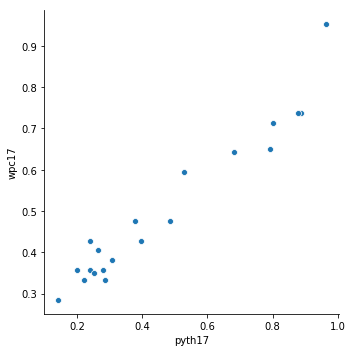

In [22]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =gp2017)

In [23]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=gp2017).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.81e-12
Time:                        03:24:48   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [24]:
gp2018_home = games_played_2018.groupby(['HomeTeam'])['count','homewinvalue', 'FTHG','FTAG'].sum().reset_index()
gp2018_away = games_played_2018.groupby(['AwayTeam'])['count','awaywinvalue', 'FTHG','FTAG'].sum().reset_index()
gp2018_home = gp2018_home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
gp2018_away = gp2018_away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
gp2018_away

,team,Pa,awaywinvalue,FTHGa,FTAGa
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


## Step 7 (=Step 5 (away team))

In [25]:
gp2018 = pd.merge(gp2018_home, gp2018_away, on = ['team'])
gp2018

,team,Ph,homewinvalue,FTHGh,FTAGh,Pa,awaywinvalue,FTHGa,FTAGa
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


In [66]:
largest_gap = gp2018[['team', 'homewinvalue', 'awaywinvalue']]
largest_gap['diff'] = abs(largest_gap['homewinvalue'] - largest_gap['awaywinvalue'])
largest_gap

,team,homewinvalue,awaywinvalue,diff
0,Arsenal,7.5,1.0,6.5
1,Bournemouth,5.0,4.0,1.0
2,Brighton,5.5,1.5,4.0
3,Burnley,3.5,4.0,0.5
4,Chelsea,4.5,4.5,0.0
5,Crystal Palace,4.5,4.5,0.0
6,Everton,5.5,2.5,3.0
7,Huddersfield,2.5,2.5,0.0
8,Leicester,5.0,2.5,2.5
9,Liverpool,7.0,5.0,2.0


## Step 7 (=Step 6 (away team))

In [39]:
gp2018['W'] = gp2018['homewinvalue'] + gp2018['awaywinvalue']
gp2018['G'] = gp2018['Ph'] + gp2018['Pa']
gp2018['GF'] = gp2018['FTHGh'] + gp2018['FTAGa']
gp2018['GA'] = gp2018['FTAGh'] + gp2018['FTHGa']

#pythagorean expectation

gp2018['wpc18'] = gp2018['W'] / gp2018['G']
gp2018['pyth18'] = gp2018['GF']**2 / (gp2018['GF']**2 + gp2018['GA']**2)
gp2018.drop(['wpc17', 'pyth17'], axis=1, inplace=True)
gp2018

,team,Ph,homewinvalue,FTHGh,FTAGh,Pa,awaywinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc18,pyth18
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Optional steps, not required for Assessment
### (Uncomment to run)

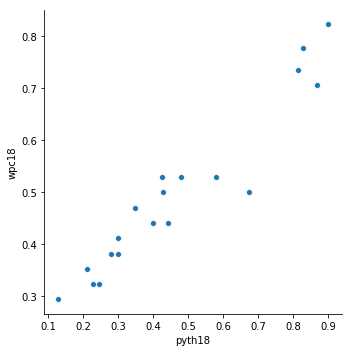

In [40]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =gp2018)

In [41]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=gp2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           5.02e-11
Time:                        03:50:50   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [43]:
Half2predictor = pd.merge(gp2017, gp2018, on = ['team'])
Half2predictor

,team,Ph_x,homewinvalue_x,FTHGh_x,FTAGh_x,Pa_x,awaywinvalue_x,FTHGa_x,FTAGa_x,W_x,...,Pa_y,awaywinvalue_y,FTHGa_y,FTAGa_y,W_y,G_y,GF_y,GA_y,wpc18,pyth18
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,...,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,...,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,...,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,...,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,...,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,...,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,...,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,...,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,...,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,...,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Step 9

In [ ]:
pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=gp2018).fit()
pyth_lm.summary()

## Optional steps, not required for Assessment
### (Uncomment to run)

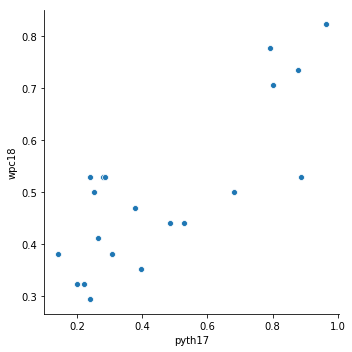

In [44]:
sns.relplot(x="pyth17", y="wpc18", data =Half2predictor)

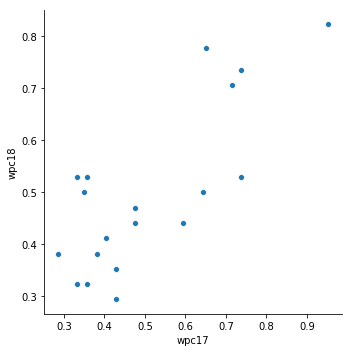

In [45]:
sns.relplot(x="wpc17", y="wpc18", data =Half2predictor)

In [67]:
keyvars = Half2predictor[['team','wpc18','wpc17','pyth17','pyth18']]
keyvars.corr()

,wpc18,wpc17,pyth17,pyth18
wpc18,1.000000,0.756573,0.795693,0.955986
wpc17,0.756573,1.000000,0.968204,0.745832
pyth17,0.795693,0.968204,1.000000,0.795331
pyth18,0.955986,0.745832,0.795331,1.000000


Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?